In [1]:
from FastFitClassifier import FastFitClassifier
import pandas as pd
from tqdm.auto import tqdm

tqdm.pandas()

In [8]:
DEV = True
model_path = "./models/relevance/avsolatorio/GIST-small-Embedding-v0"
# model_path = './models/relevance/avsolatorio/GIST-Embedding-v0'


if DEV:
    model_path=model_path.replace('relevance', 'relevance/dev')
else:
    model_path = model_path.replace('-small','')

In [10]:
def import_labelled_data(path="data/level-1.5/potential/data.json"):
    data = pd.read_json(path, encoding="latin-1")
    return data



print("Loading data...")

test_dataset = import_labelled_data(path="../../../data/level-1.5/potential/dev/data.json", )


print("Data loaded.")

if DEV:
    test_dataset = test_dataset.sample(min(5000,len(test_dataset)))

test_dataset = test_dataset.sample(frac=1).reset_index(drop=True)


test_dataset.info()

Loading data...
Data loaded.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           207 non-null    object 
 1   text          207 non-null    object 
 2   relevance     207 non-null    object 
 3   multiclasses  207 non-null    object 
 4   predictions   207 non-null    object 
 5   score-lv1     207 non-null    float64
dtypes: float64(1), object(5)
memory usage: 9.8+ KB


In [11]:
test_dataset.head()

,url,text,relevance,multiclasses,predictions,score-lv1
0,http://yoderlab.org/cms/wp-content/uploads/201...,Molecular Evolutionary Dynamics of Cytochrome ...,irrelevant,[],relevant,0.978671
1,https://digitalarchive.worldfishcenter.org/bit...,MARINE ECOLOGY PROGRESS SERIES Vol. 588: 85–10...,irrelevant,[],relevant,0.996996
2,https://digitalarchive.worldfishcenter.org/bit...,- ..-.- -. ISSN 01164435 ICLARM CONFERENCE PRO...,irrelevant,[],relevant,0.988478
3,https://digitalarchive.worldfishcenter.org/bit...,h s i F d l r o W / g n i a h K n i W w a y K ...,irrelevant,[],relevant,0.998812
4,https://zooreach.org/downloads/ZOO_CAMP_PHVA_r...,ASIATIC LION Panthera leo persica Population &...,irrelevant,[],relevant,0.991014


In [12]:
import torch
torch.cuda.empty_cache()

In [13]:
classifier = FastFitClassifier(
    model_path=model_path,
    text_overlap_proportion=0.2,
    device='cuda'
)

The model 'FastFit' is not supported for text-classification. Supported models are ['AlbertForSequenceClassification', 'BartForSequenceClassification', 'BertForSequenceClassification', 'BigBirdForSequenceClassification', 'BigBirdPegasusForSequenceClassification', 'BioGptForSequenceClassification', 'BloomForSequenceClassification', 'CamembertForSequenceClassification', 'CanineForSequenceClassification', 'LlamaForSequenceClassification', 'ConvBertForSequenceClassification', 'CTRLForSequenceClassification', 'Data2VecTextForSequenceClassification', 'DebertaForSequenceClassification', 'DebertaV2ForSequenceClassification', 'DistilBertForSequenceClassification', 'ElectraForSequenceClassification', 'ErnieForSequenceClassification', 'ErnieMForSequenceClassification', 'EsmForSequenceClassification', 'FalconForSequenceClassification', 'FlaubertForSequenceClassification', 'FNetForSequenceClassification', 'FunnelForSequenceClassification', 'GemmaForSequenceClassification', 'Gemma2ForSequenceClassif


Model loaded.
Tokenizer loaded....
Building classifier pipeline...
Classifier pipeline built.


  0%|          | 0/207 [00:00<?, ?it/s]

Data chunked.


Files	:   0%|          | 0/207 [00:00<?, ?it/s]

Chunks	:   0%|          | 0/62716 [00:00<?, ?it/s]

Calculated predictions.
Evaluating model...

-----------------------------------------------------

Classification Report: 
              precision    recall  f1-score   support

  irrelevant       1.00      0.98      0.99       207
    relevant       0.00      0.00      0.00         0

    accuracy                           0.98       207
   macro avg       0.50      0.49      0.50       207
weighted avg       1.00      0.98      0.99       207

-----------------------------------------------------
Accuracy: 0.98068
Precision: 0.5
Specificity: 0.98068


/root/.local/share/virtualenvs/GreyLiteratureClassifier-eJH_GeT1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.local/share/virtualenvs/GreyLiteratureClassifier-eJH_GeT1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.local/share/virtualenvs/GreyLiteratureClassifier-eJH_GeT1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control

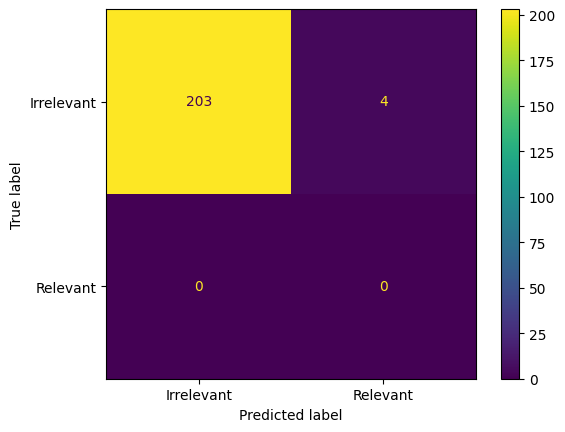

In [14]:

#! on fastfit/modeling.py, line 838, inserting **kwargs to the function arguments
#! it's easier to just silently accept and not use extra tokenizer return values
#! than getting it to stop outputting things like token_type_ids

predicted_data = classifier.evaluate(
    test_dataset,
    metrics=[
        "accuracy",
        "precision",
        "classification-report",
        "specificity",
        "confusion-matrix-mpl",
    ],
    aggregate="majority",
)

In [15]:
potential = predicted_data[predicted_data["predictions"] == "relevant"]
potential = potential.sort_values(by="score-lv2", ascending=False)


In [16]:
predicted_data.sort_values(by="score-lv2", ascending=False)['url']
predicted_data.head(10)

8      https://www.worldparkscongress.org/sites/wpc/f...
206    https://yearofthesalmon.org/wp-content/uploads...
186    https://www.wyoextension.org/agpubs/pubs/wsws-...
63     https://yearofthesalmon.org/wp-content/uploads...
93     https://yearofthesalmon.org/wp-content/uploads...
                             ...                        
125    https://digitalarchive.worldfishcenter.org/bit...
199    https://repositorio.imarpe.gob.pe/bitstream/20...
17     https://repositorio.unfv.edu.pe/bitstream/hand...
150    https://yearofthesalmon.org/wp-content/uploads...
77     https://www.deevetproducts.com/_files/ugd/3a33...
Name: url, Length: 207, dtype: object

In [17]:
potential.head()

,url,text,relevance,multiclasses,predictions,score-lv1,score-lv2
205,https://digitalarchive.worldfishcenter.org/bit...,biology Article Reproductive Biology and Ecolo...,irrelevant,[],relevant,0.995655,0.997382
101,https://digitalarchive.worldfishcenter.org/bit...,I ICLARM Technical Reports ~ ~ -U';;.l71w..jj~...,irrelevant,[],relevant,0.998002,0.991583
55,http://makir.mak.ac.ug/bitstream/handle/10570/...,Real-Time Imaging of the Intracellular Glutath...,irrelevant,[],relevant,0.972263,0.987151
104,http://www.wpcouncil.org/wp-content/uploads/20...,2021 Quantitative estimates of post-release su...,irrelevant,[],relevant,0.998000,0.984980


In [18]:

if DEV:
    from os import makedirs, path
    if not path.exists("../../../data/level-2.5/potential/dev"):
        makedirs("../../../data/level-2.5/potential/dev")
    potential.to_json("../../../data/level-2.5/potential/dev/data.json", orient="records", indent=4)
else:
    potential.to_json("../../../data/level-2.5/potential/data.json", orient="records", indent=4)

In [22]:
with pd.option_context('display.max_colwidth', 400):
    print(potential['url'])

205    https://digitalarchive.worldfishcenter.org/bitstream/handle/20.500.12348/4196/2cd85fb2d1d40845c98d77ac35cecd50.pdf?sequence=2&isAllowed=y
101                      https://digitalarchive.worldfishcenter.org/bitstream/handle/20.500.12348/2817/Pub%20TR4%2049.pdf?sequence=1&isAllowed=y
55                                        http://makir.mak.ac.ug/bitstream/handle/10570/2127/kasozi-mohring-conas-res.pdf?sequence=1&isAllowed=y
104                                                          http://www.wpcouncil.org/wp-content/uploads/2020/11/08.C1-Hutchinson-et-al-2021.pdf
Name: url, dtype: object
